<a href="https://colab.research.google.com/github/pravincoder/Tensorflow_models/blob/main/Model_2_MultiClass_Classification_Model_with_FashionMnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a larger example (multiclass classification)


### **Problem**:- Fashion/Dress Classification problem

when we have more than 2 classes as an option , its know as **Multi-Class Classification**.

#### In this problem we have to classify different images of clothing by building a neural network using multi-class classification.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
# The data is already been sorted in training and test sets for us.
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()
# More info link = https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [ ]:
#Check the first training example
print(f"Training Sample:\n{train_data[0]}\n train Label:\n {train_labels[0]}" )
print(f"Test Sample: \n {test_data[0]}\n test Label: \n {test_labels[0]}")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

## Labels name and Number of each label
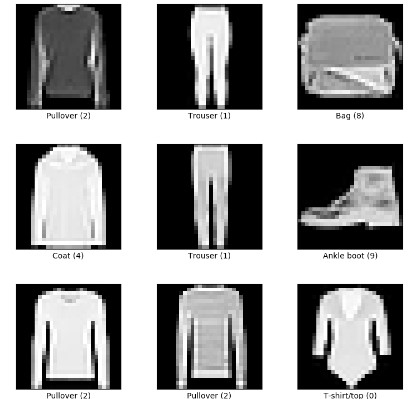

In [ ]:
# Get shape of data
train_data[0].shape,test_data[0].shape

((28, 28), (28, 28))

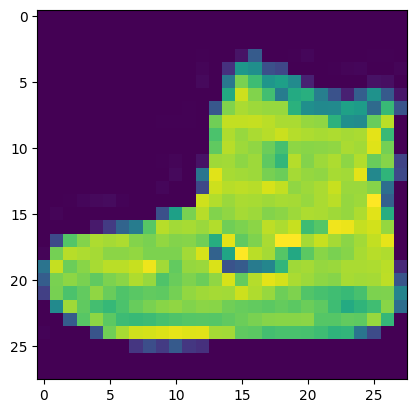

In [ ]:
# Plot a sample
plt.imshow(train_data[0]);


In [ ]:

# Check Sample label
(train_labels[0])

9

In [ ]:
# Get the labels human read able name of each number label
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneker","Bag","Ankle Boot"]
len(label_names)

10

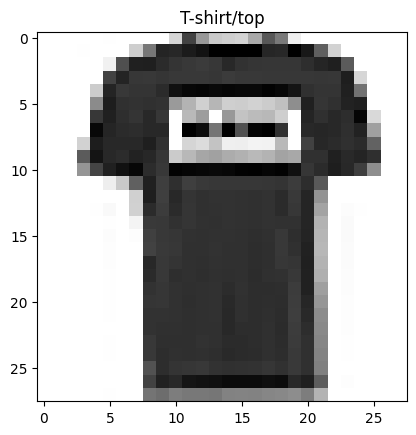

In [ ]:
def label_info(index_choice):
  plt.imshow(train_data[index_choice],cmap=plt.cm.binary)
  plt.title(label_names[train_labels[index_choice]])

index_choice = 1
label_info(index_choice)

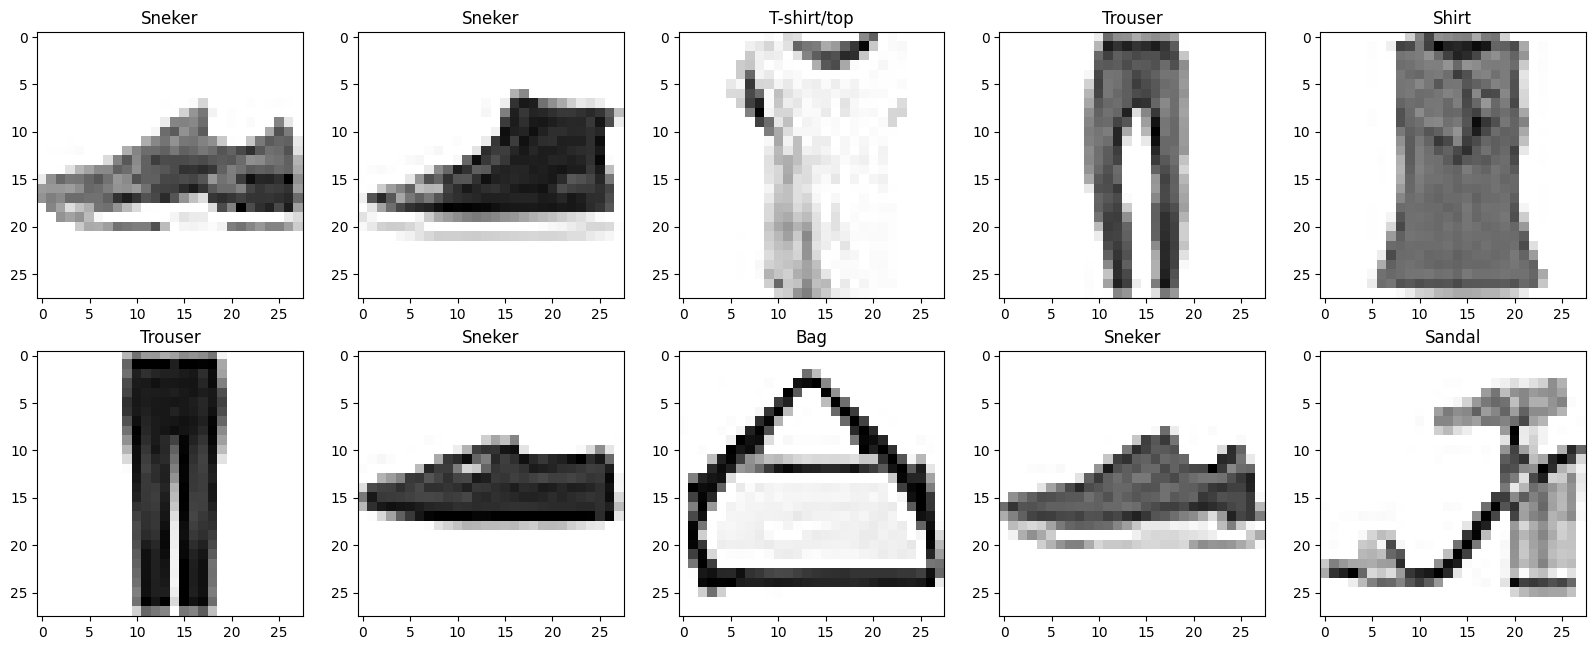

In [ ]:
# lets plot multiple random images of fashion mnist
import random
plt.figure(figsize=(20,20))
for i in range(10):
  ax = plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(train_data)))
  label_info(rand_index)

# Building a Multi-Class Classifattion Model

#### for our multi-class classification , we can first try the simalar archictecture to our binary classifier :

* Input Shape= 28X28 (Shape of one img)
* Output Shape = 10 (one per class of clothing)
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
  * If *labels are one_hot encoded*, use CategoricalCrossentropy()
  * If *labels are integer form* , use SparseCategoricalCrossentropy()
* Output Layer Activation = Softmax (Not Sigmoid)

In [ ]:
# Flatten Layer
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
# Random Seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    # our data need to be flatten
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile
model_1.compile(optimizer='Adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

# Fit
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels,depth=10),
                               epochs=10,
                               validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4157 - accuracy: 0.0965 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3005 - accuracy: 0.1021 - val_loss: 2.2858 - val_accuracy: 0.1077
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.1345 - accuracy: 0.1571 - val_loss: 1.7114 - val_accuracy: 0.2234
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6825 - accuracy: 0.2299 - val_loss: 1.6468 - val_accuracy: 0.2444
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5915 - accuracy: 0.2834 - val_loss: 1.5934 - val_accuracy: 0.2734
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5682 - accuracy: 0.2891 - val_loss: 1.5431 - val_accura

In [ ]:
model_1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FLatten_layer (Flatten)     (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                7850      
                                                                 
 dense_33 (Dense)            (None, 20)                220       
                                                                 
 dense_34 (Dense)            (None, 10)                210       
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,390
Trainable params: 8,390
Non-trainable params: 0
_________________________________________________________________


### Normalization
##### Neural network prefer data to be in scaled (NORMALIZED) , this means the generally have number in the from of tensor's between 0 & 1.

In [ ]:
# Check the min and max value of training data
train_data.min(),train_data.max()

(0, 255)

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
norm_train_data = train_data/255.0
norm_test_data = test_data/255.0
norm_train_data[4421].shape

(28, 28)

In [ ]:
# Random Seed
tf.random.set_seed(42)

# Create Model
Model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile Model
Model_2.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model
norm_history = Model_2.fit(norm_train_data,train_labels,epochs=25,validation_data=(norm_test_data,test_labels))

Epoch 1/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7553 - accuracy: 0.7245 - val_loss: 0.5389 - val_accuracy: 0.8105
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4935 - accuracy: 0.8263 - val_loss: 0.5219 - val_accuracy: 0.8118
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4497 - accuracy: 0.8404 - val_loss: 0.4813 - val_accuracy: 0.8276
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4266 - accuracy: 0.8495 - val_loss: 0.4638 - val_accuracy: 0.8374
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4138 - accuracy: 0.8538 - val_loss: 0.4746 - val_accuracy: 0.8315
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4039 - accuracy: 0.8560 - val_loss: 0.4687 - val_accuracy: 0.8334
Epoch 7/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8592 - val_loss: 0.4489 - val_accuracy

**NOTE**- Neural network tend to prefer data in numerical form as well as scaled/normalized (numbers b/w 0 & 1)

<Axes: title={'center': 'Normalized Data'}>

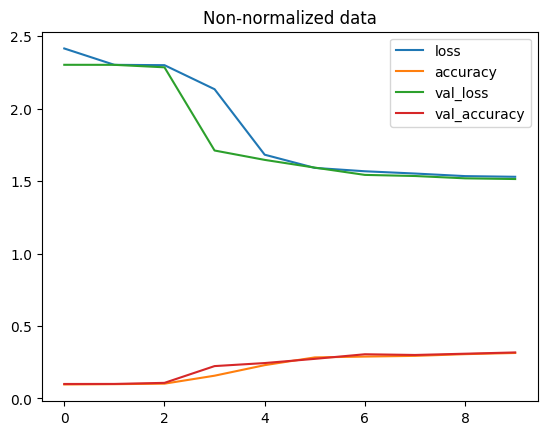

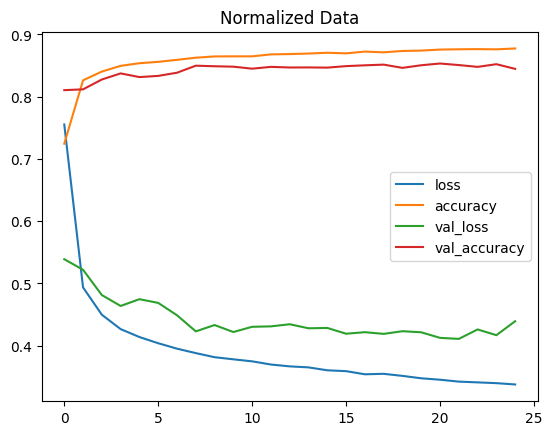

In [ ]:
import pandas as pd
# Comparing both models using graph
# plot Non-Normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# plot Normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='Normalized Data')

# Ideal Learning Rate

In [ ]:
#Check the best learning rate for the model
tf.random.set_seed(42)

# Create Model
Model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile Model
Model_3.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch/20))
# Fit the model
fit_lr_history = Model_3.fit(norm_train_data,train_labels,epochs=100,validation_data=(norm_test_data,test_labels),callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3122 - accuracy: 0.1108 - val_loss: 2.2958 - val_accuracy: 0.1107 - lr: 1.0000e-06
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2812 - accuracy: 0.1063 - val_loss: 2.2699 - val_accuracy: 0.1063 - lr: 1.1220e-06
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2585 - accuracy: 0.1081 - val_loss: 2.2499 - val_accuracy: 0.1111 - lr: 1.2589e-06
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2388 - accuracy: 0.1119 - val_loss: 2.2285 - val_accuracy: 0.1121 - lr: 1.4125e-06
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2148 - accuracy: 0.1128 - val_loss: 2.2020 - val_accuracy: 0.1148 - lr: 1.5849e-06
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1868 - accuracy: 0.1192 - val_loss: 2.1728 - val_accuracy: 0.1248 - lr: 1.7783e-06
Epoch 7/100
1875/1875 [=====

Text(0.5, 1.0, 'Finding the ideal learning rate')

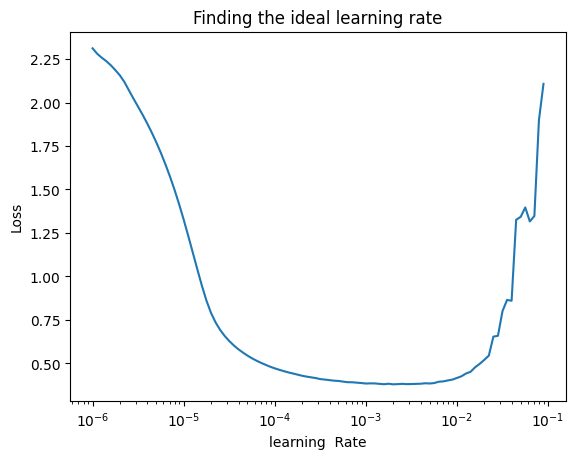

In [ ]:
import matplotlib.pyplot as plt
lrs = 1e-6 * (10**(tf.range(100)/20))
plt.semilogx(lrs,fit_lr_history.history['loss'])
plt.xlabel("learning  Rate")
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate")

From the above graph we can know that the ideal learning rate
---
1e-3 or 10**3

In [ ]:
 # Random Seed
tf.random.set_seed(42)

# Create Model
Model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,),name="FLatten_layer"),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation='Softmax')
])
# Compile Model
Model_4.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

# Fit the model
history_4 = Model_4.fit(norm_train_data,train_labels,epochs=20,validation_data=(norm_test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6977 - accuracy: 0.7533 - val_loss: 0.5363 - val_accuracy: 0.8147
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4990 - accuracy: 0.8258 - val_loss: 0.5101 - val_accuracy: 0.8206
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4626 - accuracy: 0.8378 - val_loss: 0.5004 - val_accuracy: 0.8200
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4381 - accuracy: 0.8464 - val_loss: 0.4647 - val_accuracy: 0.8340
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4208 - accuracy: 0.8523 - val_loss: 0.4677 - val_accuracy: 0.8304
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4075 - accuracy: 0.8564 - val_loss: 0.4692 - val_accuracy: 0.8336
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3999 - accuracy: 0.8591 - val_loss: 0.4526 - val_accuracy:

## Evaluating our Multi-class Classification Model

To Evaluate our multi-class classification model :
* Evalaute its performance using other classification metrics (such as a confusion matrix).
* Asses some of its prediction (through visualization).
* Improve its results (by training it for longer or changing the architecture).
* Save and Export it for in an applications.

In [ ]:
# Create a confusion matrix
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_test,y_pred,classes=None,figsize=(10,10),text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_test,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normailize
  n_classes =cm.shape[0]
  #lets prettify it
  fig,ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues) # first cm = confusion matrix , plt.cm refers colorMap
  fig .colorbar(cax)

  #Check Classes

  if classes:
    label = classes
  else:
    label = np.arange(cm.shape[0])

  #label the axis
  ax.set(title = "Confusion Matrix",
        xlabel = "Prediction label",
        ylabel = "True label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = label,
        yticklabels = label)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #set Threshold for different color
  threshold = (cm.max()+cm.min())/2

  #plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i,s= f"{cm[i,j]} ({cm_norm[i,j]*100:.2f}%)",
            horizontalalignment="center",
            color='white' if cm[i,j] > threshold else"black",
            size=text_size)

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Make some Prediction on test data
y_tpred = Model_4.predict(test_data)

#View 5 test pred
y_tpred[0:5]
print("ERROR as the training was on Normalized data so test data should be in Normalized form")

313/313 [==============================] - 1s 1ms/step
ERROR as the training was on Normalized data so test data should be in Normalized form


In [ ]:
# Make some Prediction on test data
y_tpred = Model_4.predict(norm_test_data)

#View 5 test pred
y_tpred[0:5]

313/313 [==============================] - 1s 1ms/step


array([[1.94896274e-05, 1.12724025e-04, 3.53096038e-05, 7.27243198e-04,
        1.07614296e-05, 4.00650278e-02, 1.03200118e-05, 8.74175802e-02,
        2.43192967e-02, 8.47282290e-01],
       [1.31211011e-04, 9.83272912e-08, 9.67216372e-01, 1.73212993e-05,
        9.60860215e-03, 3.04003041e-19, 2.29952782e-02, 3.18791268e-15,
        3.11181248e-05, 8.31797959e-15],
       [3.25232509e-06, 9.99994695e-01, 1.14245822e-07, 1.28186139e-06,
        5.55143117e-07, 7.15980712e-27, 9.93799709e-09, 1.72454915e-16,
        6.60601795e-09, 5.45279533e-13],
       [5.57144460e-07, 9.99978006e-01, 7.95133772e-08, 1.93599226e-05,
        1.97391932e-06, 9.90504994e-25, 3.65169317e-09, 6.56888891e-14,
        1.02917328e-08, 5.46964661e-11],
       [1.39887556e-01, 1.00281170e-06, 5.62389642e-02, 6.45871926e-03,
        8.12110305e-03, 3.64214242e-10, 7.80254364e-01, 1.73616059e-13,
        9.03817825e-03, 1.49000621e-11]], dtype=float32)

**NOTE**- Remember to make prediction on same kind of data your model was trained on.

In [ ]:
y_tpred[0],tf.argmax(y_tpred[0]),label_names[tf.argmax(y_tpred[0])]

(array([1.94896274e-05, 1.12724025e-04, 3.53096038e-05, 7.27243198e-04,
        1.07614296e-05, 4.00650278e-02, 1.03200118e-05, 8.74175802e-02,
        2.43192967e-02, 8.47282290e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_tpred = y_tpred.argmax(axis=1)
# View the first 10 prediction labels
y_tpred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_tpred)

array([[812,   5,  12,  42,   5,   2, 109,   0,  13,   0],
       [  2, 963,   6,  23,   6,   0,   0,   0,   0,   0],
       [ 19,   0, 736,  11, 159,   0,  66,   0,   9,   0],
       [ 26,  15,   6, 854,  55,   0,  38,   0,   6,   0],
       [  0,   2,  79,  27, 845,   0,  44,   0,   3,   0],
       [  0,   0,   0,   0,   0, 933,   0,  38,  11,  18],
       [144,   1, 104,  40, 123,   1, 570,   0,  17,   0],
       [  0,   0,   0,   0,   0,  27,   0, 948,   1,  24],
       [  2,   0,   4,   3,  14,   2,  11,   4, 960,   0],
       [  0,   0,   0,   0,   0,  21,   0,  41,   2, 936]])

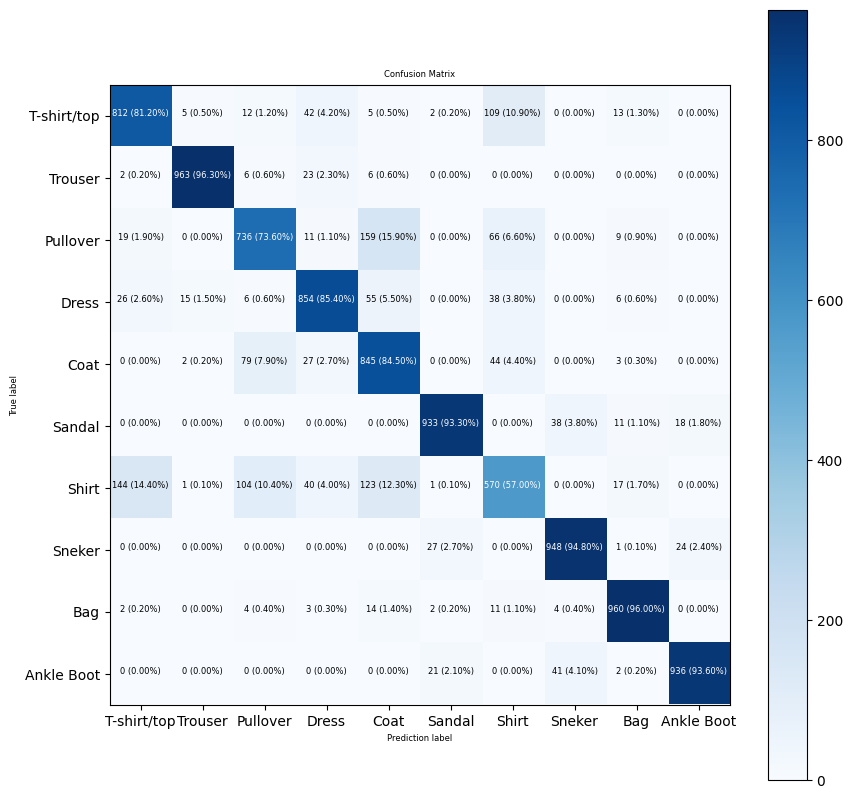

In [ ]:
# Make Confusion Matrix
make_confusion_matrix(y_test=test_labels,y_pred=y_tpred,classes=label_names,figsize=(10,10),text_size=6)

> **Note :** Often when working with images and other forms of visual data,it's good idea to visualize as much as possible!

Play Around task:
* Plot a random img.
* Make Prediction .
* LAbel the plot with Truth Label and Prediction.

In [ ]:
import random
# point 1
def pick_random_img(model,images,true_labels,classes):
  # Set random integer
  rand = random.randint(0,len(images))
  #Create Prediction and Target
  target = images[rand]
  pred_pro=model.predict(target.reshape(1,28,28))
  pred_label=classes[pred_pro.argmax()]
  true_label=classes[true_labels[rand]]
  #Plot the target
  plt.imshow(target,cmap=plt.cm.binary)
  # Change the color of the title
  if pred_label==true_label:
    color="green"
  else:
    color='red'
  # Add xlabel info(pred/true_label)
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label,100*tf.reduce_max(pred_pro),true_label),color=color)

1/1 [==============================] - 0s 23ms/step


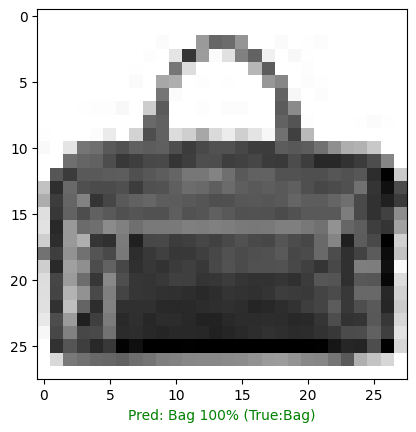

In [ ]:
pick_random_img(model=Model_4,images=test_data,true_labels=test_labels,classes=label_names)


In [ ]:
Model_4.layers

In [ ]:
weights,biases =Model_4.layers[1].get_weights()

In [ ]:
weights[0].shape

(10,)

In [ ]:
weights.shape #(shape = 28*28 = 748 ,layer = 10 layers)

(784, 10)

In [ ]:
Model_4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FLatten_layer (Flatten)     (None, 784)               0         
                                                                 
 dense_44 (Dense)            (None, 10)                7850      
                                                                 
 dense_45 (Dense)            (None, 20)                220       
                                                                 
 dense_46 (Dense)            (None, 10)                210       
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,390
Trainable params: 8,390
Non-trainable params: 0
_________________________________________________________________


Now Check the bias Vector

In [ ]:
biases

array([-0.04666971,  0.6312996 , -0.18669847,  0.02323548,  0.20834897,
       -0.04425796,  0.5030214 ,  0.16643292,  0.07192811,  1.0047475 ],
      dtype=float32)

In [ ]:
biases.shape

(10,)

Every Neuron has a bias vector.Each of it is paired with a weight matrix.

The bias vector get intialized as zeros(at least in the case of Tensorflow Dense Layer).

The bias vector dictates how much the pattern within the corresponding weight matrix should influence the next layer.

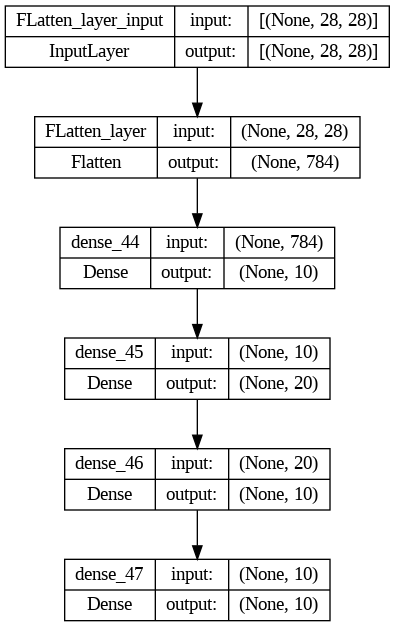

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(Model_4,show_shapes=True)